# Ekstremi funkcija

In [1]:
import math
import csv
import os.path
import sys
import pandas as pd
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

from mpl_toolkits import mplot3d
from matplotlib import cm
from IPython.display import YouTubeVideo

%matplotlib agg

## Lokalni ekstremi

**Definicija 1.** _Neka je $A \subseteq \mathbb{R^n}$ otvoren, $f: A\rightarrow \mathbb{R}$ i $c \in A.$_
- _Ako postoji okolina $U(c)$ na kojoj je $f(c)$ maksimum_
$( \forall x \in U(c) \hspace{3mm} f(c) \ge f(x) ),$
_kažemo da je $c$ **lokalni maksimum**, a $f(c)$ je vrijednost lokalnog maksimuma._
- _Ako postoji okolina $U(c)$ na kojoj je $f(c)$ minimum_
$(\forall x \in U(c) \hspace{3mm} f(c) \le f(x)),$
_kažemo da je $c$ **lokalni minimum**, a $f(c)$ je vrijednost lokalnog minimuma._
- _$c$ je **lokalni ekstrem** ako je lokalni minimum ili lokalni minimum funkcije $f$._

- _$c$ je **stacionarna točka** ako je funkcija $f$ diferencijabilna u $c$ i $Df(c) = 0$_

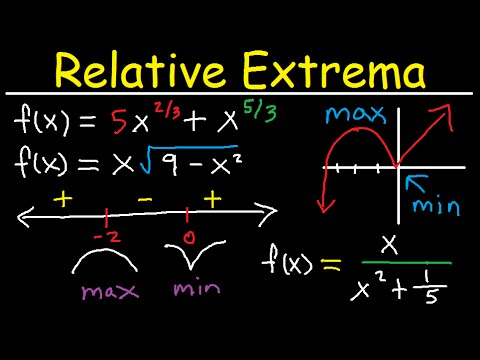

In [2]:
YouTubeVideo('VZuJ4bGj2D0')

**Lokalni maksimum:**

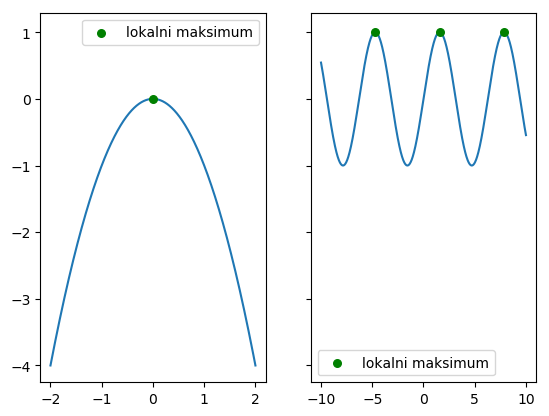

In [3]:
%matplotlib agg

fig, (lijevo, desno) = plt.subplots(1, 2, sharey=True)
x = np.linspace(-2, 2, 1000)
lijevo.plot(x, -x**2, zorder=1)
lijevo.scatter(0, 0, s=30, c='g', zorder=2, label='lokalni maksimum')
lijevo.legend()

x = np.linspace(-10, 10, 1000)
desno.plot(x, np.sin(x), zorder=1)
X=[math.pi/2, math.pi/2 + 2*math.pi, math.pi/2 - 2*math.pi]
Y=[1, 1, 1]
desno.scatter(X, Y, s=30, c='g', zorder=2, label='lokalni maksimum')
desno.legend()

fig

**Lokalni minimum:**

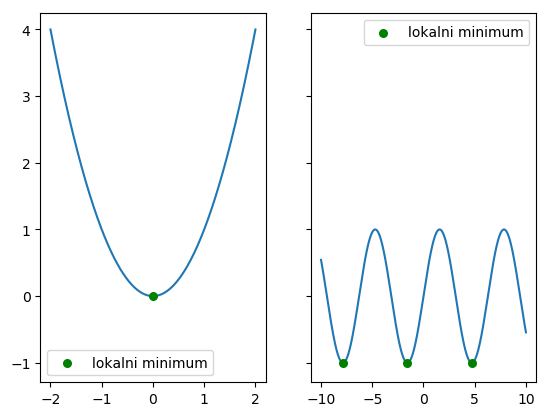

In [4]:
%matplotlib agg

fig, (lijevo, desno) = plt.subplots(1, 2, sharey=True)
x = np.linspace(-2, 2, 1000)
lijevo.plot(x, x**2, zorder=1)
lijevo.scatter(0, 0, s=30, c='g', zorder=2, label='lokalni minimum')
lijevo.legend()

x = np.linspace(-10, 10, 1000)
desno.plot(x, np.sin(x), zorder=1)
X=[-math.pi/2, -math.pi/2 + 2*math.pi, -math.pi/2 - 2*math.pi]
Y=[-1, -1, -1]
desno.scatter(X, Y, s=30, c='g', zorder=2, label='lokalni minimum')
desno.legend()

fig

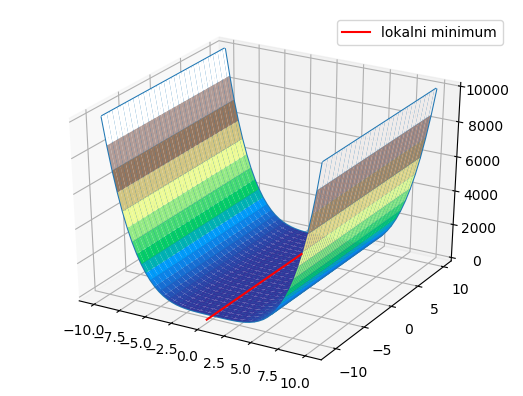

In [5]:
%matplotlib agg

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')
x, y = np.meshgrid(np.linspace(-10, 10), np.linspace(-10, 10))
z = x**4
ax.plot_wireframe(x, y, z, rstride=2, cstride=2)
ax.plot_surface(x, y, z, cmap='terrain', linewidth=1)

ax2 = fig.gca(projection='3d')
y = np.linspace(-11, 5.5, 100)
x = 0 * y
z = 0 
ax2.plot(x, y, z, c='r', label='lokalni minimum')
ax2.legend()

fig

**Teorem 2. (Nužan uvjet za lokalni ekstrem)** _Neka je $A \subseteq \mathbb{R^n}$ otvoren i $f: A\rightarrow \mathbb{R}$ diferencijabilna u $c \in A$. Ako je $c$ lokalni ekstrem funkcije $f$ onda je $Df(c)=0$ (tj. $c$ je stacionarna točka funkcije $f$)._

**Teorem 3. (Dovoljni uvjeti za lokalni ekstrem)** _Neka je $A \subseteq \mathbb{R^n}$ otvoren i $f: A\rightarrow \mathbb{R}$ klase $C^2$._
- _Ako je $c \in A$ stacionarna točka i $H_f(c)$ je negativno definitna matrica onda $f$ ima lokalni maksimum u $c$._
- _Ako $f$ ima lokalni maksimum u $c$ onda je $H_f(c)$ negativno semidefinitna._
- _Ako je $c \in A$ stacionarna točka i $H_f(c)$ je pozitivno definitna matrica onda $f$ ima lokalni minimum u $c$._
- _Ako $f$ ima lokalni minimum u $c$ onda je $H_f(c)$ pozitivno semidefinitna._
- _Ako je $c \in A$ stacionarna točka i $H_f(c)$ je indefinitna matrica onda $f$ nema u točki $c$ lokalni ekstrem, tj. $c$ je sedlasta točka funkcije $f$._

Prethodna dva teorema nam daju način **kako analitički odrediti lokalne ekstreme** neke funkcije:
1. Odredimo sve točke $c \in A$ takve da $Df(c)=0$. Po Teoremu 2. one su kandidati za lokalne ekstreme.
2. Za njih izračunamo $H_f(c)$.
3. Iskoristimo Teorem 3.

In [6]:
def grad(f,var):
    return [sp.diff(f,x) for x in var]

def hess(f,var):
    return sp.Matrix([[f.diff(x).diff(y) for x in var] for y in var])

x,y = sp.symbols('x y')

def f(x,y):
    return x**2 + y**2

Možemo izračunati gradijent i Hessian u nekoj točki, npr. u točki $(1,1)$ da vidimo je li u njoj lokalni ekstrem. Po obratu po kontrapoziciji Teorema 2 znamo da u $(1,1)$ nije lokalni ekstrem funkcije $f(x,y)=x^2+y^2$ jer $Df(1,1)=(2,2)$

In [7]:
# evaluacija gradijenta u (1,1)
[i.n(5, subs={x: 1, y: 1}) for i in grad(f(x,y), [x,y])]

[2.0000, 2.0000]

**Primjer 4.** Nađimo lokalne ekstreme funkcije $f(x,y) = \sqrt{x^2+y^2 + \frac{1}{x^2y^2} }$.

$\sqrt{x}$ je strogo rastuća funkcija pa funkcija $f(x,y) = \sqrt{x^2+y^2 + \frac{1}{x^2y^2} }$ ima lokalne ekstreme u istim točkama kao i funkcija $f(x,y) = x^2+y^2 + \frac{1}{x^2y^2}$ i oni su iste vrste. Zato dalje analiziramo funkciju $f(x,y) = x^2+y^2 + \frac{1}{x^2y^2}$.

In [8]:
def f(x,y):
    return x**2 + y**2 + 1/(x**2*y**2)

g = grad(f(x,y), [x,y])
print("Gradijent funkcije f je: ",g)

stac_tocke = sp.solve(g, sp.symbols('x y'))  # Ako stavim real=True kao stacionarne točke mi da []
stac_tocke = [a for a in stac_tocke if sp.im(a[0])==0 and sp.im(a[1])==0]
print("Stacionarne točke:", stac_tocke)

Gradijent funkcije f je:  [2*x - 2/(x**3*y**2), 2*y - 2/(x**2*y**3)]
Stacionarne točke: [(-1, -1), (-1, 1), (1, -1), (1, 1)]


In [9]:
h = hess(f(x,y), [x,y])
print("Hessian funkcije f:")
h   # ovisi o x i y

Hessian funkcije f:


Matrix([
[2 + 6/(x**4*y**2),     4/(x**3*y**3)],
[    4/(x**3*y**3), 2 + 6/(x**2*y**4)]])

In [10]:
temp = h.eigenvals()
print("Svojstvene vrijednosti:", temp)

Svojstvene vrijednosti: {sqrt(9*x**4 - 2*x**2*y**2 + 9*y**4)/(x**4*y**4) + (2*x**4*y**4 + 3*x**2 + 3*y**2)/(x**4*y**4): 1, -sqrt(9*x**4 - 2*x**2*y**2 + 9*y**4)/(x**4*y**4) + (2*x**4*y**4 + 3*x**2 + 3*y**2)/(x**4*y**4): 1}


In [11]:
def is_pos_def(d,point):
    for key in d:
        temp = sp.lambdify((x,y),key)(point[0], point[1])
        if temp <= 0:
            return False
    return True

In [12]:
print("h je pozitivno definitna u (1,1):", is_pos_def(temp, [1,1]))
print("h je pozitivno definitna u (1,-1):", is_pos_def(temp, [1,-1]))
print("h je pozitivno definitna u (-1,1):", is_pos_def(temp, [-1,1]))
print("h je pozitivno definitna u (-1,-1):", is_pos_def(temp, [-1,-1]))

h je pozitivno definitna u (1,1): True
h je pozitivno definitna u (1,-1): True
h je pozitivno definitna u (-1,1): True
h je pozitivno definitna u (-1,-1): True


$H_f$ je pozitivno definitna u sve četiri stacionarne točke pa po Teoremu 3 zaključujemo da funkcija $f$ u sve četiri ima lokalne minimume.

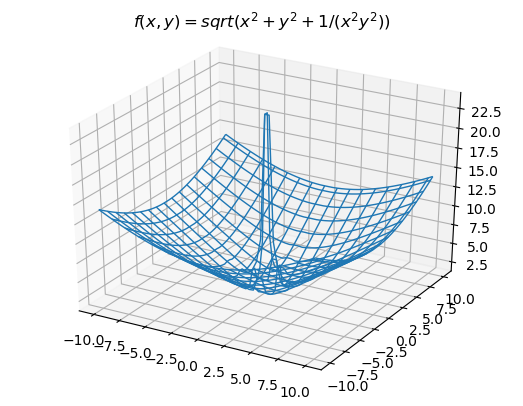

In [13]:
%matplotlib agg

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')
x, y = np.meshgrid(np.linspace(-10, 10), np.linspace(-10, 10))
z = np.sqrt(x**2 + y**2 + 1/(x**2*y**2))
ax.plot_wireframe(x, y, z, rstride=3, cstride=3, linewidth=1)
s = '$f(x,y) = sqrt(x^2+y^2 + 1/(x^2y^2))$'
ax.set_title(s, y=1.05)

fig

**Primjer 5.** Nađimo lokalne ekstreme funkcije $f(x,y) = (x + y)(xy + xy^2)$.

In [14]:
x,y = sp.symbols('x y')

def f(x,y):
    return (x + y)*(x*y+x*y**2)

g = grad(f(x,y), [x,y])
print("Gradijent funkcije f je:", g)

stac_tocka = sp.solve(g, sp.symbols('x y'))
print("Stacionarne točke:", stac_tocka)

Gradijent funkcije f je: [x*y**2 + x*y + (x + y)*(y**2 + y), x*y**2 + x*y + (x + y)*(2*x*y + x)]
Stacionarne točke: [(0, -1), (0, 0), (3/8, -3/4), (1, -1)]


In [15]:
h = hess(f(x,y), [x,y])
h    # ovisi o x i y

Matrix([
[                            2*y**2 + 2*y, 2*x*y + x + y**2 + y + (x + y)*(2*y + 1)],
[2*x*y + x + y**2 + y + (x + y)*(2*y + 1),                4*x*y + 2*x*(x + y) + 2*x]])

In [16]:
Delta1 = sp.lambdify((x,y), h[0,0])
print("Delta1:", Delta1(0,-1))

temp = h.det()
Delta2 = sp.lambdify((x,y), temp)
print("Delta2:", Delta2(0,-1))

Delta1: 0
Delta2: -1


Koristimo **Sylvesterov kriterij**. U našem slučaju:
$$\Delta _1 = h_1 = 0 \ge 0$$
$$\Delta _2 = det(H_f(0,-1)) = -1 < 0$$

Zaključujemo da je $H_f(0,-1)$ indefinitna pa iz Teorema 3. slijedi da funkcija $f$ u $(0,-1)$ ima sedlastu točku.

In [17]:
Delta1 = sp.lambdify((x,y), h[0,0])
print("Delta1:", Delta1(1,-1))

temp = h.det()
Delta2 = sp.lambdify((x,y), temp)
print("Delta2:", Delta2(1,-1))

Delta1: 0
Delta2: -1


Analogno kao kod točke $(0,-1)$ zaključujemo da funkcija $f$ u $(1,-1)$ ima sedlastu točku.

In [18]:
Delta1 = sp.lambdify((x,y), h[0,0])
print("Delta1:", Delta1(3/8,-3/4))

temp = h.det()
Delta2 = sp.lambdify((x,y), temp)
print("Delta2:", Delta2(3/8,-3/4))

Delta1: -0.375
Delta2: 0.2109375


Ponovo koristimo **Sylvesterov kriterij**.
$$\Delta _1 = h_1 = -0.375 < 0$$
$$\Delta _2 = det(H_f( \frac{3}{8} , \frac{-3}{4})) = 0.2109375 > 0$$

Zaključujemo da je $H_f( \frac{3}{8} , \frac{-3}{4})$ negativno definitna pa iz Teorema 3. slijedi da funkcija $f$ u $( \frac{3}{8} , \frac{-3}{4})$ ima lokalni maksimum.

In [19]:
Delta1 = sp.lambdify((x,y), h[0,0])
print("Delta1:", Delta1(0,0))

temp = h.det()
Delta2 = sp.lambdify((x,y), temp)
print("Delta2:", Delta2(0,0))

Delta1: 0
Delta2: 0


$$\Delta _1 = h_1 = 0$$
$$\Delta _2 = det(H_f(0,0)) = 0$$

$H_f(0,0)$ nije ni pozitivno/negativno definitna ni indefinitna pa ne možemo iz Teorema 3. zaključiti o kakvoj se stacionarnoj točki radi.

Očito $f(0,0) = (0,0)$

In [20]:
sp.simplify(f(x,x))

2*x**3*(x + 1)

Pogledajmo polupravce $p_1 = \{(x,x):x \in \langle 0, \infty + \rangle \}$ i $p_2 = \{(x,x):x \in \langle - \infty , 0 \rangle \}$. <br/>
Očito je $$(\forall x \in \langle 0, \infty + \rangle) \hspace{3mm} f(x,x) > 0$$ i $$(\forall x \in \langle -1,0 \rangle) \hspace{3mm} f(x,x) < 0$$ pa slijedi da funkcija $f$ u točki $(0,0)$ ima sedlastu točku.

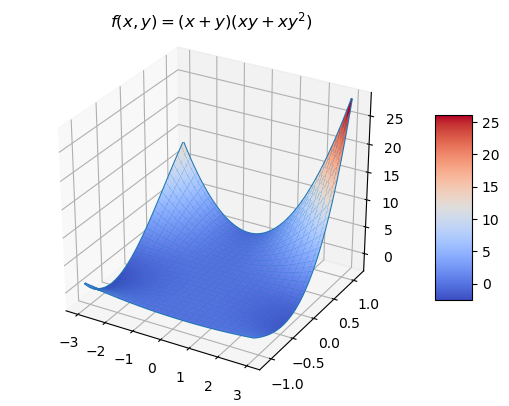

In [21]:
%matplotlib agg

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')
x, y = np.meshgrid(np.linspace(-3, 3), np.linspace(-1.1, 1.1))
z = f(x,y)
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm, 
                       linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.plot_wireframe(x, y, z, rstride=2, cstride=2)
ax.plot_surface(x, y, z, cmap=cm.coolwarm, linewidth=1)
ax.set_title('$f(x,y)=(x + y)(xy + xy^2)$', y=1.05)

fig

**Primjer 6.** Nađimo lokalne ekstreme funkcije $f(x,y,z,w) = 5(x-3)^3 + 9(y-2)^2 - 9(z+3)^3 - 11(w+2)^2$.

In [21]:
x,y,z,w = sp.symbols('x y z w')

def f(x,y,z,w):
    return 5*(x - 3)**2 + 9*(y - 2)**2 - 9*(z + 3)**3 - 11*(w + 2)**2

g = grad(f(x,y,z,w),[x,y,z,w])
print("Gradijent funkcije f je:",g)

stac_tocka = sp.solve(g, sp.symbols('x y z w'))
print("Stacionarne točke:", stac_tocka)

Gradijent funkcije f je: [10*x - 30, 18*y - 36, -27*(z + 3)**2, -22*w - 44]
Stacionarne točke: [(3, 2, -3, -2)]


Jedini kandidat je točka $(3, 2, -3, -2)$.

In [22]:
h = hess(f(x,y,z,w),[x,y,z,w])
h    # ovisi o x i y

Matrix([
[10,  0,           0,   0],
[ 0, 18,           0,   0],
[ 0,  0, -54*z - 162,   0],
[ 0,  0,           0, -22]])

In [23]:
Delta1 = sp.lambdify((x,y,z,w),h[0,0])
print("Delta1:", Delta1(3,2,-3,-2))

temp = h[0:2,0:2].det()
Delta2 = sp.lambdify((x,y,z,w),temp)
print("Delta2:", Delta2(3,2,-3,-2))

temp = h[0:3,0:3].det()
Delta3 = sp.lambdify((x,y,z,w),temp)
print("Delta3:", Delta3(3,2,-3,-2))

temp = h.det()
Delta4 = sp.lambdify((x,y,z,w),temp)
print("Delta4:", Delta4(3,2,-3,-2))

Delta1: 10
Delta2: 180
Delta3: 0
Delta4: 0


Imamo: $$\Delta _1 = 10 > 0$$
       $$\Delta _2 = 180 > 0$$
       $$\Delta _3 = 0 \ge 0$$
       $$\Delta _4 = 0 \ge 0$$
       
Slijedi da je $H_f(3,2,-3,2)$ pozitivno semidefinitna.

Sada nam ostaje odrediti ima li funkcija $f$ u $((3,2,-3,2)$ sedlastu točku ili lokalni minimum.
Neka je $\varepsilon > 0$. <br/>
$$d(((3,2,-3,2), (3 + \sqrt[3]{\frac{\varepsilon}{2}}, 2, -3, -2)) = \sqrt[3]{\frac{\varepsilon}{2}} < \varepsilon$$
$$f(3 + \sqrt[3]{\frac{\varepsilon}{2}}, 2, -3, -2) = \frac{5\varepsilon}{2} > 0$$
$$d(((3,2,-3,2), (3 - \sqrt[3]{\frac{\varepsilon}{2}}, 2, -3, -2)) = \sqrt[3]{\frac{\varepsilon}{2}} < \varepsilon$$
$$f(3 - \sqrt[3]{\frac{\varepsilon}{2}}, 2, -3, -2) = -\frac{5\varepsilon}{2} < 0$$
Slijedi da funkcija $f$ u točki $(3,2,-3,2)$ ima sedlastu točku.

## Gradijentna metoda

**Algoritam** (tražimo lokalni **minimum**):

$x \gets$ slučajno odabrani vektor <br/>
**do**: <br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $x \gets (x - \lambda \nabla f(x))$ <br/>
**while** nije ispunjen uvjet zaustavljanja <br/>
**return $x$**

Napomena: Za maksimum bi bilo $x \gets (x + \lambda \nabla f(x))$.

In [24]:
def grad_met(f, var, lamda, aproks):
    lista = [aproks]
    for i in range(1000):
        temp = np.asarray( sp.lambdify(var, grad(f,var))(aproks[0], aproks[1]) )
        new = aproks - lamda * temp
        if np.linalg.norm(aproks - new) < 10**-10:
            return new, lista
        aproks = new
        lista.append(np.ndarray.tolist(aproks))
    return aproks, lista

**Primjer 8.** Iskoristimo gradijentnu metodu na funkciji $f(x,y) = arctg(xy) + log(3x^2 + y^2 + 1)^2$ s inicijalnom aproksimacijom $(-90,80)$ i $\lambda = 1$.

In [ ]:
x,y = sp.symbols('x y')

def f(x,y):
    return sp.atan(x*y) + sp.log(3*x**2 + y**2 + 1)**2

aproks, history = grad_met(f(x,y), [x,y], 1, [-90,80])

for el in history:
    el.extend([f(el[0],el[1])])

print("Aproksimacija:", aproks )
print("f(", aproks[0],",",aproks[1],") =", f(aproks[0], aproks[1]))

%matplotlib agg

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')
x, y = np.meshgrid(np.linspace(-100, 100), np.linspace(-100, 100))
z = np.arctan(x*y) + np.log(3*x**2 + y**2 + 1)**2
ax.plot_wireframe(x, y, z, rstride=5, cstride=5, linewidth=1)

for el in history:  
    ax.scatter(el[0], el[1], el[2], s=20, c='y', zorder=1)
ax.scatter(history[1][0], history[1][1], history[1][2],
           s=30, c='y', label='međutočka')
first = history[0]
last = history[-1]
ax.scatter(first[0], first[1], first[2],
           s=30, c='r', zorder=2, label='početna aproksimacija')
ax.scatter(last[0], last[1], last[2],
           s=50, c='g', zorder=3, label='krajnja aproksimacija')
ax.legend()
ax.set_title('$f(x,y) = arctg(xy) + log(3x^2+y^2+1)^2, \lambda = 1$', y=1.08 )

fig

Mane gradijentne metode su to što joj može trebati puno iteracija da bi dosla do optimuma, što će se vidjeti na idućem grafu. S druge strane, ona može divergirati čak i na konveksnim funkcijama ako stavimo prevelik $\lambda$. Na ovom ćemo primjeru za npr. $\lambda = 20$ vidjeti da su pomaci vrlo kaotični.

Razlog takvog ponašanja gradijentne metode je to što veličina pomaka u nekoj iteraciji ovisi o gradijentu funkcije u trenutnoj aproksimaciji. Ako je taj gradijent malen pomaci će biti mali. Zbog toga nam kod relativno ravnih funkcija može trebati velik $\lambda$ i puno iteracija. S druge strane, kod funkcija koje imaju jako strma područja pomaci mogu biti jako veliki. Ta strma područja uzrokuju onako kaotično ponašanje na primjeru s $\lambda = 20$.

In [ ]:
x,y = sp.symbols('x y')

def f(x,y):
    return sp.atan(x*y) + sp.log(3*x**2 + y**2 + 1)**2

aproks, history = grad_met(f(x,y), [x,y], 0.1, [-90,80])

for el in history:
    el.extend([f(el[0],el[1])])

print("Aproksimacija:", aproks )
print("f(", aproks[0],",",aproks[1],") =", f(aproks[0], aproks[1]))

%matplotlib agg

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')
x, y = np.meshgrid(np.linspace(-100, 100), np.linspace(-100, 100))
z = np.arctan(x*y) + np.log(3*x**2 + y**2 + 1)**2
ax.plot_wireframe(x, y, z, rstride=5, cstride=5, linewidth=1)

for el in history:  
    ax.scatter(el[0], el[1], el[2], s=20, c='y', zorder=1)
ax.scatter(history[1][0], history[1][1], history[1][2],
           s=30, c='y', label='međutočka')
first = history[0]
last = history[-1]
ax.scatter(first[0], first[1], first[2],
           s=30, c='r', zorder=2, label='početna aproksimacija')
ax.scatter(last[0], last[1], last[2],
           s=50, c='g', zorder=3, label='krajnja aproksimacija')
ax.legend()
ax.set_title('$f(x,y) = arctg(xy) + log(3x^2+y^1)^2, \lambda = 0.1$', y=1.08 )

fig

Aproksimacija: [-7.68868989  4.73700801]
f( -7.6886898894139755 , 4.737008005580843 ) = 26.5704568057171


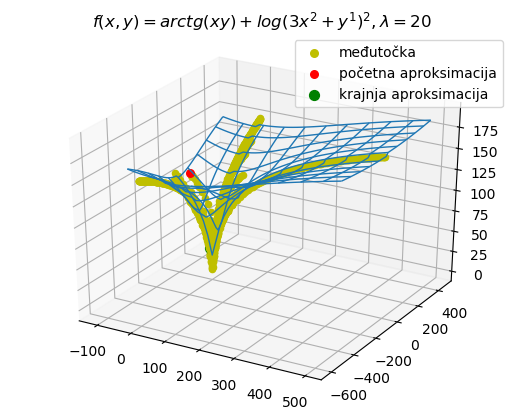

In [28]:
x,y = sp.symbols('x y')

def f(x,y):
    return sp.atan(x*y) + sp.log(3*x**2 + y**2 + 1)**2

aproks, history = grad_met(f(x,y), [x,y], 20, [-90,80])

for el in history:
    el.extend([f(el[0],el[1])])

print("Aproksimacija:", aproks )
print("f(", aproks[0],",",aproks[1],") =", f(aproks[0], aproks[1]))

%matplotlib agg

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')
x, y = np.meshgrid(np.linspace(-100, 500), np.linspace(-400, 400))
z = np.arctan(x*y) + np.log(3*x**2 + y**2 + 1)**2
ax.plot_wireframe(x, y, z, rstride=5, cstride=5, linewidth=1)

for el in history:  
    ax.scatter(el[0], el[1], el[2], s=20, c='y', zorder=1)
ax.scatter(history[1][0], history[1][1], history[1][2],
           s=30, c='y', label='međutočka')
first = history[0]
last = history[-1]
ax.scatter(first[0], first[1], first[2],
           s=30, c='r', zorder=2, label='početna aproksimacija')
ax.scatter(last[0], last[1], last[2],
           s=50, c='g', zorder=3, label='krajnja aproksimacija')
ax.legend()
ax.set_title('$f(x,y) = arctg(xy) + log(3x^2+y^1)^2, \lambda = 20$', y=1.08 )

fig

## Newtonova metoda

**Algoritam** (tražimo lokalni **minimum**):

$x \gets$ slučajno odabrani vektor <br/>
**do**: <br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $x \gets (x - H_f(x)^{-1}  \nabla f(x))$ <br/>
**while** nije ispunjen uvjet zaustavljanja <br/>
**return $x$** <br/>

Napomena: Za maksimum bi bilo $x \gets (x + H_f(x)^{-1}  \nabla f(x))$.

In [29]:
def newton(f, var, aproks):
    lista = [aproks]
    for i in range(1000):
        temp = hess(f,var).inv()*sp.Matrix(grad(f,var))
        temp2 = np.asarray( sp.lambdify(var,temp)(aproks[0], aproks[1]) )
        temp2 = temp2.flatten()
        new = aproks - temp2
        if np.linalg.norm(aproks - new) < 10**-10:
            return new, lista
        aproks = new
        lista.append(np.ndarray.tolist(aproks))
    return aproks, lista    

**Primjer 9.** Iskoristimo Newtonovu metodu na funkciji $f(x,y) = log(1+x^2) + y^2$ s inicijalnom aproksimacijom $(0.5,2)$.

Aproksimacije:
  0.500000  2.000000  4.223144
 -0.333333  0.000000  0.105361
  0.083333  0.000000  0.006920
 -0.001166  0.000000  0.000001
  0.000000  0.000000  0.000000
  0.000000  0.000000  0.000000


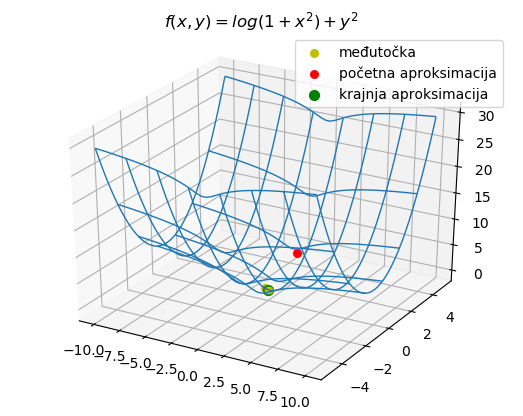

In [30]:
x,y = sp.symbols('x y')
def f(x,y):
    return sp.log(1+x**2) + y**2

aproks, history = newton(f(x,y), [x,y], [0.5,2])
for el in history:
    el.extend([f(el[0],el[1])])
    
print("Aproksimacije:")
for row in history:
    for val in row:
        sys.stdout.write('%10f' % val)
    sys.stdout.write("\n")

%matplotlib agg

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')
x, y = np.meshgrid(np.linspace(-10, 10), np.linspace(-5, 5))
z = np.log(1+x**2) + y**2
ax.plot_wireframe(x, y, z, rstride=7, cstride=7, linewidth=1, zorder=0)

for el in history:  
    ax.scatter(el[0], el[1], el[2], s=20, c='y', zorder=1)
ax.scatter(history[1][0], history[1][1], history[1][2],
           s=30, c='y', label='međutočka')
first = history[0]
last = history[-1]
ax.scatter(first[0], first[1], first[2],
           s=30, c='r', zorder=2, label='početna aproksimacija')
ax.scatter(last[0], last[1], last[2],
           s=50, c='g', zorder=3, label='krajnja aproksimacija')
ax.legend()
ax.set_title('$f(x,y) = log(1+x^2) + y^2$', y=1.08)

fig

## Hill climbing

**Algoritam:**

$s_0 \gets$ generiraj početno stanje <br/>
$s \gets s_0 $ <br/>
**do:** <br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; generiraj $N(s)$ <br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; pronađi $s'\in N(s)$ td. &nbsp;$f(s') \ge f(s''), \forall s'' \in N(s)$ <br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **if** $f(s') > f(s)$ <br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $s \gets s'$ <br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **else** stop <br/>
**while** s je ažurirana <br/>
**return** s <br/>

In [31]:
def hill_climbing(f,var,size,start,repeat):
    np.random.seed()
    temp = sp.lambdify(var,f)(start[0], start[1])
    best = [start[0], start[1], temp]
    lista = [best]
    for i in range(repeat):
        okolina = [ [best[0] + np.random.uniform(-1, 1), 
                     best[1] + np.random.uniform(-1, 1)] for i in range(size)]
        values = [ sp.lambdify(var,f)(okolina[j][0], okolina[j][1]) 
                  for j in range(size) ]
        temp = max(values)
        if(temp > best[2]):
            k = values.index(temp)
            best = [ okolina[k][0], okolina[k][1], temp ]
        lista.append(best)
    return best, lista

**Primjer 10.** Iskoristimo Hill Climbing algoritam na funkciji
$f(x,y) = \frac{sin( \sqrt{ |xy| } )}{10} + \sqrt{|cos( \frac{y}{10} )|}$ s inicijalnom aproksimacijom $(6,7)$.

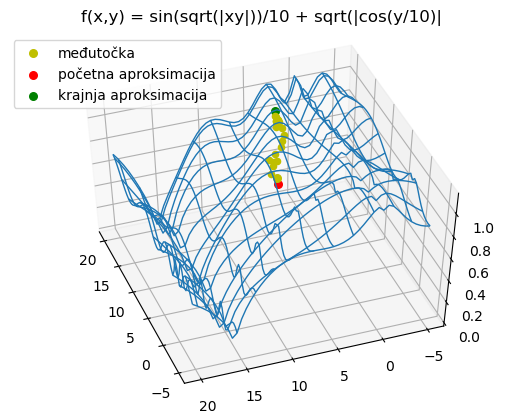

In [32]:
x,y = sp.symbols('x y')
def f(x,y):
    return sp.sin(sp.sqrt(abs(x*y)))/10 + sp.sqrt(abs(sp.cos(y/10)))

aproks, history = hill_climbing(f(x,y), [x,y], 10, [6,7], 20)

%matplotlib agg

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')
x, y = np.meshgrid(np.linspace(-5, 20), np.linspace(-5, 20))
z = np.sin(np.sqrt(abs(x*y)))/10 + np.sqrt(abs(np.cos(y/10)))
ax.plot_wireframe(x, y, z, rstride=4, cstride=4, linewidth=1)

for el in history:  
    ax.scatter(el[0], el[1], el[2], s=20, c='y', zorder=-3)
ax.scatter(history[1][0], history[1][1], history[1][2],
           s=30, c='y', zorder=2, label='međutočka')
first = history[0]
last = history[-1]
ax.scatter(first[0], first[1], first[2],
           s=30, c='r', zorder=2, label='početna aproksimacija')
ax.scatter(last[0], last[1], last[2],
           s=30, c='g', zorder=3, label='krajnja aproksimacija')
ax.legend(bbox_to_anchor=(0., 0.8, 1., .102), loc=3, borderaxespad=0.)
ax.view_init(elev=50,azim=160)
ax.set_title('f(x,y) = sin(sqrt(|xy|))/10 + sqrt(|cos(y/10)|',y=1.1)

fig

            x         y    f(x,y)
0    6.000000  7.000000  0.894180
1    6.575131  6.925179  0.922107
2    7.105061  7.383728  0.941891
3    7.857899  6.821182  0.967185
4    8.795914  6.952263  0.976246
5    8.224785  6.315768  0.978198
6    8.280718  6.547172  0.978821
7    9.121986  6.214185  0.996460
8    9.833043  5.240450  1.008520
9   10.633840  4.906905  1.019928
10  11.556169  4.283466  1.022102
11  12.482948  4.172936  1.036544
12  12.806684  4.695923  1.043837
13  13.375405  4.224876  1.049409
14  13.707226  4.372818  1.051165
15  13.707226  4.372818  1.051165
16  13.806087  4.150697  1.052597
17  13.806087  4.150697  1.052597
18  14.506641  4.229449  1.054904
19  14.272820  4.149904  1.055376
20  15.261164  3.934120  1.060489


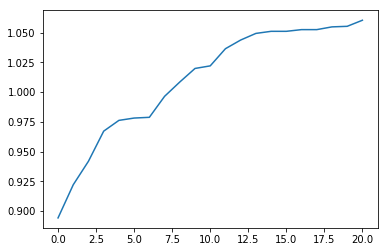

In [33]:
history.insert(0,['x','y','f(x,y)'])
my_path = os.path.dirname('__file__')
csvfile = os.path.join(my_path, "aproksimacije.csv")

with open(csvfile, "w") as output:
    writer = csv.writer(output, lineterminator='\n')
    writer.writerows(history)
    
df = pd.read_csv('aproksimacije.csv')
print(df)

%matplotlib inline
df['f(x,y)'].plot()

**Literatura:**

[1] P.Pandžić, J.Tambača,_Diferencijalni račun funkcija više varijabli_ (skripta), PMF-MO, Zagreb, 2015. <br/>
[2] G.Nogo, _Meta-heuristike_ (predavanje), PMF-MO, Zagreb, 2017. <br/>
[3] D.B.Fogel, Z.Michalewicz, _How to Solve It: Modern Heuristics_, Springer,  Berlin, 2004. <br/>
[4] https://www.pmf.unizg.hr/_download/repository/PREDAVANJE5.pdf, Zadnje pristupljeno: 6.4.2018.